In [1]:
# %load dsfs/visualize.py
from typing import List, Dict
from collections import Counter

import math
import matplotlib.pyplot as plt

from dsfs.matrix import Matrix, make_matrix
from dsfs.stats import correlation


def bucketize(point: float, bucket_size: float) -> float:
    return bucket_size * math.floor(point/bucket_size)


def make_histogram(points: List[float], bucket_size: float ) -> Dict[float, int]:
    return Counter(bucketize(point, bucket_size=bucket_size) for point in points)


def plot_histogram(points: List[float], bucket_size:float, title: str = ''):
    histogram = make_histogram(points, bucket_size=bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()


def correlation_matrix(data: Matrix) -> Matrix:
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)


def plot_correlation_matrix(corr_data: Matrix):
    num_vectors = len(corr_data)
    fig, ax = plt.subplots(num_vectors, num_vectors)
    for i in range(num_vectors):
        for j in range(num_vectors):
            if i != j:
                ax[i][j].scatter(corr_data[j], corr_data[i])
            else:
                ax[i][j].annotate(f'series {i}', (0.5,0.5), xycoords='axes fraction', ha='center', va='center')
            if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
            if j < num_vectors - 1: ax[i][j].yaxis.set_visible(False)
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())


0.1316885523130605

57.556430007559875

0.1411157913208008

57.39097856770662

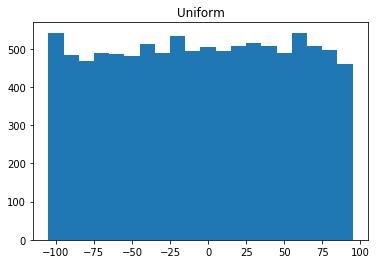

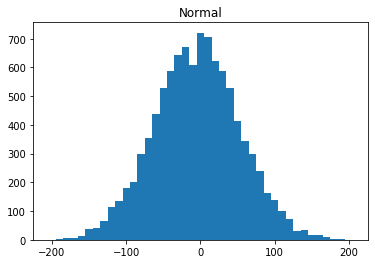

In [2]:
import random
from dsfs.probs import inverse_normal_cdf
from dsfs.stats import mean, standard_deviation, correlation
random.seed(0)
uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

display(mean(uniform), standard_deviation(uniform))
display(mean(normal), standard_deviation(normal))

plot_histogram(uniform, 10, 'Uniform')
plot_histogram(normal, 10, "Normal")

In [3]:
def random_normal():
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

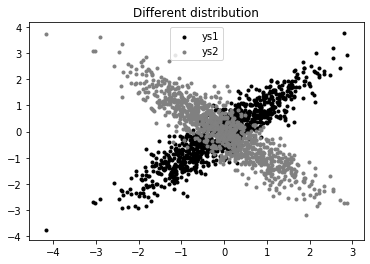

In [4]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.legend(loc=9)
plt.title('Different distribution')
plt.show()


In [5]:
display(correlation(xs, ys1))
display(correlation(xs, ys2))

0.9010493686379609

-0.8920981526880033

In [6]:
display(correlation_matrix([xs, ys1]))
display(correlation_matrix([xs, ys2]))

[[1.0, 0.9010493686379609], [0.9010493686379609, 1.0]]

[[1.0, -0.8920981526880033], [-0.8920981526880033, 1.0]]

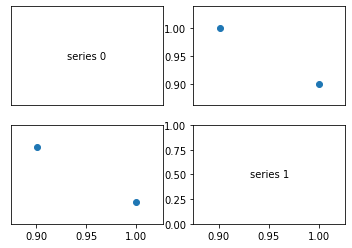

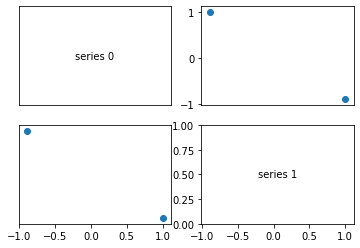

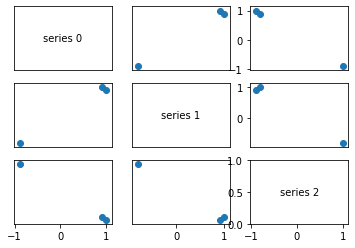

In [7]:
plot_correlation_matrix(correlation_matrix([xs, ys1]))
plot_correlation_matrix(correlation_matrix([xs, ys2]))
plot_correlation_matrix(correlation_matrix([xs, ys1, ys2]))

In [8]:
from dsfs.matrix import scale, rescale
matrix = [
    [-3, -1, 1],
    [-1,  0, 1],
    [ 1,  1, 1]
]
means, stddevs = scale(matrix)
assert means == [-1, 0, 1]
assert stddevs == [2, 1, 0]

rescaled_matrix = rescale(matrix)
display(rescaled_matrix)
scaled_means, scaled_stddevs = scale(rescaled_matrix)
assert scaled_means == [0, 0, 1]
assert scaled_stddevs == [1, 1, 0]

[[-1.0, -1.0, 1], [0.0, 0.0, 1], [1.0, 1.0, 1]]

In [9]:
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

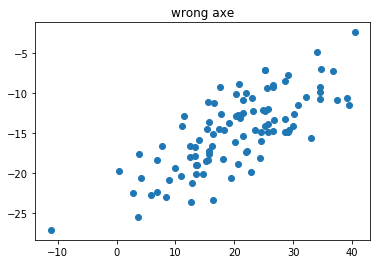

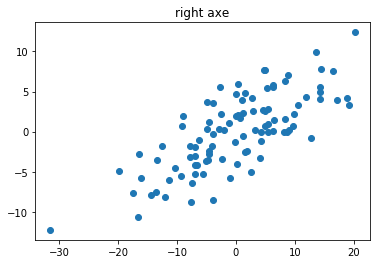

In [10]:
xs, ys = zip(*pca_data)
plt.scatter(xs, ys)
plt.title('wrong axe')
plt.show()
from dsfs.matrix import de_mean
de_mean_data = de_mean(pca_data)
xs, ys = zip(*de_mean_data)
plt.scatter(xs, ys)
plt.title('right axe')
plt.show()

[1.0, 1.0]

dv: {dv:.3f}: 100%|██████████| 100/100 [00:00<00:00, 920.75it/s]


[1.0, 1.0]

dv: {dv:.3f}: 100%|██████████| 100/100 [00:00<00:00, 1036.67it/s]


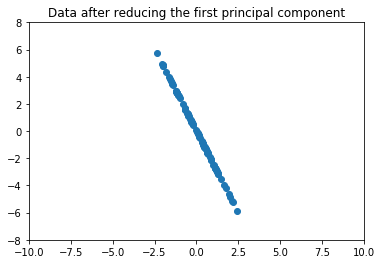

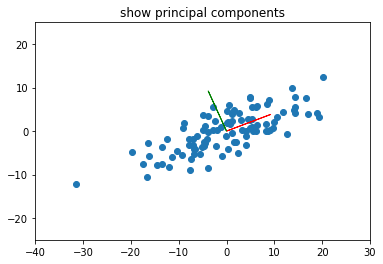

In [42]:
from dsfs.pca import first_principal_component, pca, remove_projection, transform
fpc = first_principal_component(de_mean_data)

reduced_data = remove_projection(de_mean_data, fpc)
spc = first_principal_component(reduced_data)
reduced_xs, reduced_ys = zip(*reduced_data)
plt.scatter(reduced_xs, reduced_ys)
plt.title('Data after reducing the first principal component')
plt.xlim((-10, 10))
plt.ylim((-8, 8))
plt.show()

from dsfs.vector import project
xs, ys = zip(*de_mean_data)

plt.scatter(xs, ys, label='points')
plt.arrow(0,0, fpc[0]*10, fpc[1]*10, color='red', label='fpc')
plt.arrow(0,0, spc[0]*10, spc[1]*10, color='green', label='spc')
plt.xlim((-40,30))
plt.ylim((-25,25))  
plt.title('show principal components')
plt.show()